# Chapter 16: The Sugarscape

<img src="SU_fig_01.jpg" alt="title" width="600px" />

## Motivation

**The Sugarscape**: Agent-based model with simple rules.
Can account for the transformation of a population through:
- natural selection 
- spatial segregation 
- migration
- emergence of wealth inequalities. 

The model is easily extended by introducing additional rules to add, e.g., trade, reproductive pressure, exchange of information, and environment pollution..


## Applications

- social science
- political science
- cooperation
- economics


## Schelling's model of segregation

Inspiration for the Sugarscape.

**Description of the model:**

- Town with $N^2$ houses (square lattice with $N \times N$ cells)

- $f$ : fraction of empty, available houses

- the rest of the houses is occupied by families of two *kinds* ($A$ and $B$) differing on some characteristics (e.g., language, nutrition habits, religion)

- families *positively* discriminate: each family is happy if they are not in the minority within their neighborhood (Moore's neighborhood)

- each turn a random family is chosen: if unhappy, it randomly relocates in one of the available empty houses.

Schelling showed that **segregation spontaneously emerges**.


### Implementation

Arena with $N \times N$ houses. $N = 10$.

$f$ : fraction of available houses. $f = 0.1$. 
10 houses are available to relocation if needed.

**Happiness:** defined as *not being in the minority* within the Moore's neighborhood.

In this implementation, a cell of the lattice with value:

- $0$ represents a empty house
- $1$ represents a family of type $A$
- $-1$ represents a family of type $B$

We start by randomly populating the lattice with roughly 50% - 50% proportion of $A$ and $B$ families.

In [4]:
import numpy as np 
    
def check_family_happiness(L, i, j, f_types):
    """
    Function to check whether the family in i, j is happy.
    
    Parameters
    ==========
    L : Lattice representing the town. 
    i, j : Location of the family to be checked.
    f_types : List containing the family types. 
              Ex: [1, - 1] for the types of families considered above.
    """
    
    
    Nx, Ny = L.shape
    
    ci = np.array([(i - 1) % Nx, (i - 1) % Nx, (i - 1) % Nx, 
                    i, i, i,
                    (i + 1) % Nx, (i + 1) % Nx, (i + 1) % Nx]).astype(int)
    cj = np.array([(j - 1) % Ny, j, (j + 1) % Ny,
                   (j - 1) % Ny, j, (j + 1) % Ny,
                   (j - 1) % Ny, j, (j + 1) % Ny]).astype(int)

    neighborhood = L[ci, cj]
    
    N_types = np.size(f_types)
    f_counts = np.zeros(N_types)
    
    for n in range(N_types):
        f_counts[n] = np.size(np.where(neighborhood == f_types[n])[0])
    
    i_ref = np.where(f_types == L[i, j])[0]
    
    c_similar = f_counts[i_ref]
    c_other = np.sum(f_counts) - f_counts[i_ref]
    
    # Happy if not in the minority.
    # '''
    if c_similar >= c_other:
        happiness = 1
    else:
        happiness = - 1
    # '''

    # Happy if not in the majority.
    '''
    if c_similar > c_other:
        happiness = - 1
    else:
        happiness = 1
    '''

        
    return happiness


## The Sugarscape.

The "Sugarscape" is a landscape (in the form of a lattice) where **sugar grows in each cell**.

The sugar provides energy and wealth.

**Agents explore the landscape** and, while doing it, harvest the sugar. 

- Each round, each agent move once. They move sequentially. Each round, the order in which the agent move is random.

- Two agents can't share the same cell: if an agent can't move on a free cell within its range, it remains in the cell it occupies.

- Each agent pays a metabilic cost to remain alive and move on the sugarscape. When their energy (that corresponds to their sugar level) falls below zero then they die of starvation.

At the end of each round, the **landscape regrowth the sugar** according to the growth rule $G_{\rm g}$.

For more details: see the book, page 16-5 and on.

### Features of the Sugarscape.

We start from the classical implementation: 

- squared lattice $N \times N$

- sugar full capacity of each cell: from 0 to 4

- landscape shaped like two sugar-hills

- rule $G_{\infty}$: at the end of each round, the sugar regrowth instantly to the maximum capacity of each cell.


### Agents on the Sugarscape.

Agents on sugarsape have the following features:

- vision: $v$ (uniform distribution $\in \{1, 2, ..., 6 \}$)
- sugar: $s$ (uniform distribution $\in \{5, 6, ... 25 \}$)
- metabolism: $m$ (uniform distribution $\in \{1, 2, 3, 4 \}$)

The vision determines the motion range.

The sugar is a reservoir of energy.


In [7]:
import numpy as np

def move_agents(SuSca, N_alive, V, S, M, x, y):
    """
    Function to move the agents on the sugarscape.
    Implements one round where all the agents move once.
    
    Parameters
    ==========
    SuSca : Lattice representing the Sugarscape. 
    N_alive : Number of alive agents.
    V : Vision. 1-d numpy array.
    S : Sugar. 1-d numpy array.
    M : Metabolism. 1-d numpy array.
    x : x-position on the lattice of the agents. 1-d numpy array.
    y : y-position on the lattice of the agents. 1-d numpy array.
    """
    
    Nx, Ny = SuSca.shape
    
    nSuSca = SuSca.copy()
    nx = x.copy()
    ny = y.copy()
    nS = S.copy()
    
    # Define the order of the agents in this round.   
    order = np.random.permutation(N_alive)
    
    # For each agent: move it in the range of the vision.
    
    for na in range(N_alive):
        ia = order[na]
        # Agent current position.
        xa = nx[ia]
        ya = ny[ia]
        ma = M[ia]  # Metabolic rate.
        va = V[ia]  # Vision.
        sa = nS[ia]  # Available sugar/energy amount.
        
        # Cells within the range of the agent.
        rx = np.zeros(va * 4 + 1) + xa
        ry = np.zeros(va * 4 + 1) + ya
        rx[0] = xa
        ry[0] = ya
        rx[0 * va + 1:1 * va + 1] = xa + np.arange(va) + 1
        rx[1 * va + 1:2 * va + 1] = xa - np.arange(va) - 1
        ry[2 * va + 1:3 * va + 1] = ya + np.arange(va) + 1
        ry[3 * va + 1:4 * va + 1] = ya - np.arange(va) - 1
        rx = rx.astype(int) % Nx
        ry = ry.astype(int) % Ny

        sugar = nSuSca[rx, ry]        
        max_sugar = np.amax(sugar)
        searching_new_pos = True
        sugar_level = int(max_sugar)
        
        # Agent looks for the best available position.
        while searching_new_pos:
            # Search options for a certain sugar level.
            options = np.where(sugar == sugar_level)[0]
            
            # For each option, check whether position is already occupied.            
            io = 0
            place_found = False
            while (io < np.size(options)) and (not place_found):
                i = options[io]
                x_ref = rx[i] % Nx
                y_ref = ry[i] % Ny
                # Check if the position is available.
                a_ref = np.intersect1d(
                    np.where(nx == x_ref)[0],
                    np.where(ny == y_ref)[0])
                if np.size(a_ref) == 0:
                    # Position is available
                    nx[na] = x_ref 
                    ny[na] = y_ref
                    nS[na] += nSuSca[x_ref, y_ref]  # Agent takes the sugar.
                    nSuSca[x_ref, y_ref] = 0   # Sugarscape cell is depleted.
                    place_found = True
                else:
                    # Check whether this is the current position.
                    if (x_ref == nx[na]) and (y_ref == ny[na]):
                        nS[na] += nSuSca[x_ref, y_ref]  # Agent takes the sugar.
                        nSuSca[x_ref, y_ref] = 0   # Sugarscape cell is depleted.
                        place_found = True
                    else:
                        # The position is occupied by someone else.
                        io += 1
            
            # If we are here, we either have found a place or 
            # exausted the possibilities for this sugar_level
            
            if not place_found:
                if sugar_level > 0:
                    sugar_level -= 1
                else:
                    # The agent stays where it is.                    
                    nS[na] += nSuSca[nx[na], ny[na]]  # Agent takes the sugar.
                    nSuSca[nx[na], ny[na]] = 0
                    searching_new_pos = False
            else: 
                # A place has been found for the agent.
                searching_new_pos = False
        
    
    # All agents have moved.
    
    # Now pay the metabolic price.
    nS = nS - M
    
    # Now check which agents are still alive.
    still_alive = np.where(nS > 0)[0]
    
    N_still_alive = np.size(still_alive)
    V_alive = V[still_alive]
    S_alive = nS[still_alive]
    M_alive = M[still_alive]
    x_alive = nx[still_alive]
    y_alive = ny[still_alive]
        
    return nSuSca, N_still_alive, V_alive, S_alive, M_alive, x_alive, y_alive




Initialize the sugarscape in the "classical" way.

In [8]:
def initialize_sugarscape(N):
    """
    Function to generate the "classical" sugarscape.
    
    Parameters
    ==========
    N : Side of the sugarscape lattice.
    """
    
    SuSca = np.zeros([N, N])
    X, Y = np.meshgrid(np.arange(N), np.arange(N))
    
    x_centers = np.array([N / 4, 3 * N / 4])
    y_centers = np.array([N / 4, 3 * N / 4])

    r_levels = np.array([4, 3, 2, 1]) / 4 * (np.sqrt(2) / 4) * N
    s_levels = np.array([1, 2, 3, 4])
    
    for k in range(np.size(x_centers)):
        d = np.sqrt((X - x_centers[k]) ** 2 +
                    (Y - y_centers[k]) ** 2)
        for i in range(np.size(s_levels)):
            region = np.where(d <= r_levels[i])
            SuSca[region[0], region[1]] = s_levels[i]
    
    return SuSca


Function to convert a 2 dimensional numpy array into a RGB image.

In [9]:
def convert2RBG(game_outcome, RGB0, RGB1):
    """
    Function to convert the 2 dimensional numpy array into a RGB image.
    
    Parameters
    ==========
    game_outcome : Outcome of the prisoner's dilemma.
    RGB0 : Components R, G, B of the chosen color shade for minimum I_profile.
    RGB1 : Components R, G, B of the chosen color shade for maximum I_profile.
    """
    
    [n_rows, n_cols] = game_outcome.shape
    
    I_RGB = np.zeros([n_rows, n_cols, 3])
    
    # Set I_profile between 0 and 1
    game_outcome -= np.amin(game_outcome)    
    game_outcome /= np.amax(game_outcome)  
    
    for c in range(3):
        I_RGB[:, :, c] = game_outcome * RGB1[c] + (1 - game_outcome) * RGB0[c]

    return I_RGB

Check whether the initialization works.

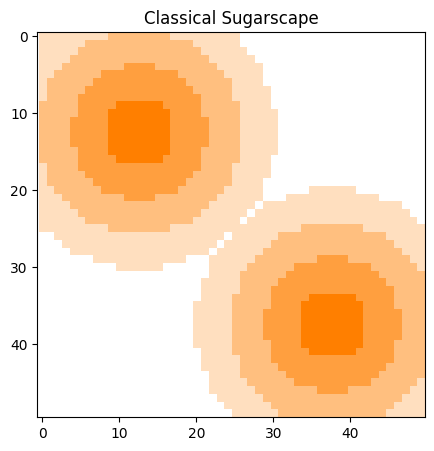

In [10]:
from matplotlib import pyplot as plt

N = 50  # Side of the sugarscape.

SuSca = initialize_sugarscape(N)

# Create the image of the game outcome.
RGB1 = [1.0, 0.5, 0.0]  # Orange. Color for high values.
RGB0 = [1.0, 1.0, 1.0]  # White. Color for low values.
SuSca_RGB = convert2RBG(SuSca, RGB0, RGB1)

# Plot the Sugarscape.
plt.figure(figsize=(5, 5))
plt.imshow(SuSca_RGB)  # Plot Sugarscape profile.
# Plot the reference points.
plt.title('Classical Sugarscape')
plt.axis('equal')
plt.show()       


In [ ]:
from random import sample

N = 50  # Size of the sugarscape with the agents.
A = 400  # Number of agents on the sugarscape.

# Initial values. Chosen from the following flat distributions.
possible_m = np.arange(4) + 1  # Metabolic rate.
possible_v = np.arange(6) + 1  # Vision.
possible_s = np.arange(21) + 5  # Sugar.

# Agents initialized. 
M = np.random.randint(np.size(possible_m), size=A) + 1
V = np.random.randint(np.size(possible_v), size=A) + 1
S = np.random.randint(np.size(possible_s), size=A) + 5

# New Initialize agents
Agents = [
    np.random.randint(np.size(possible_m), size=A),
    np.random.randint(np.size(possible_v), size=A) + 1,
    np.random.randint(np.size(possible_s), size=A) + 5
    ]

# Define agents position. 
L = np.array(sample(range(N * N), A)).astype(int) 
x = L % N
y = ((L - x) / N).astype(int) 
# This way each agent occupy a different cell.

SuSca = initialize_sugarscape(N)

In [12]:
import time 
from tkinter import Tk
from tkinter import Canvas

r0 = 0.25
N_skip = 1

# Visualize status every N_skip steps. 
window_size = 600

cell_color_list = ['#FFFFFF', '#FFECCE', '#FFCE88', '#FFA040', '#FF8000']

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window.
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:

    nSuSca, nA, nV, nS, nM, nx, ny = move_agents(SuSca, A, V, S, M, x, y)

    # Update animation frame.
    if step % N_skip == 0:        
        canvas.delete('all')
        SU_cells = []
        for i in range(N):
            for j in range(N):
                cell_color = cell_color_list[int(nSuSca[i, j])]
                #
                SU_cells.append(
                    canvas.create_rectangle(
                        i / N * window_size, 
                        j / N * window_size,
                        (i + 1) / N * window_size,
                        (j + 1) / N * window_size, 
                        outline='', 
                        fill=cell_color,
                    )
                )
        Agents_circ = []
        for i in range(nA):
            Agents_circ.append(
                canvas.create_oval(
                    (nx[i] + 0.5 - r0) / N * window_size, 
                    (ny[i] + 0.5 - r0) / N * window_size,
                    (nx[i] + 0.5 + r0) / N * window_size,
                    (ny[i] + 0.5 + r0) / N * window_size, 
                    outline='', 
                    fill='#000000',
                )
            )
        
        tk.title(f'Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(0.1)  # Increase to slow down the simulation.

    A = nA
    V = nV.copy()
    S = nS.copy()
    M = nM.copy()
    x = nx.copy()
    y = ny.copy()
    step += 1
    
tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).

TclError: invalid command name ".!canvas"

Now let's try without animation.

In [ ]:
from random import sample

N = 50  # Size of the sugarscape with the agents.
A = 400  # Number of agents on the sugarscape.

# Initial values. Chosen from the following flat distributions.
possible_m = np.arange(4) + 1  # Metabolic rate.
possible_v = np.arange(6) + 1  # Vision.
possible_s = np.arange(21) + 5  # Sugar.

# Agents initialized. 
M = np.random.randint(np.size(possible_m), size=A) + 1
V = np.random.randint(np.size(possible_v), size=A) + 1
S = np.random.randint(np.size(possible_s), size=A) + 5

M0 = M.copy()
S0 = S.copy()
V0 = V.copy()

# Define agents position. 
L = np.array(sample(range(N * N), A)).astype(int) 
x = L % N
y = ((L - x) / N).astype(int) 
# This way each agent occupy a different cell.

SuSca = initialize_sugarscape(N)

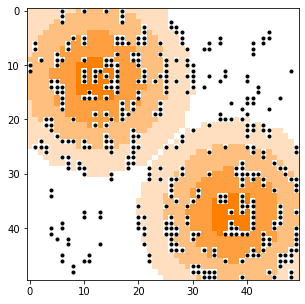

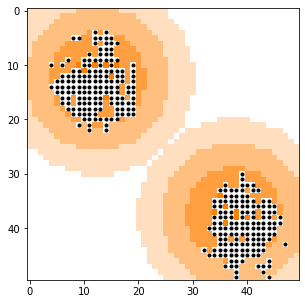

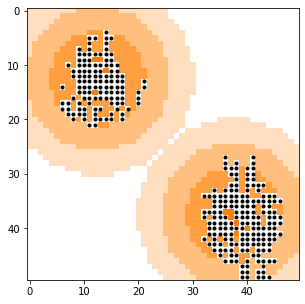

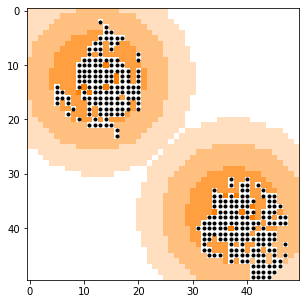

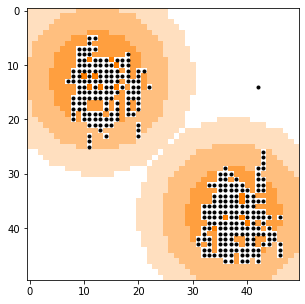

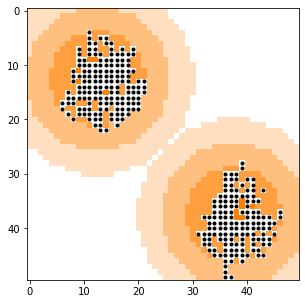

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
    
# Create the image of the game outcome.
RGB1 = [1.0, 0.5, 0.0]  # Orange. Color for high values.
RGB0 = [1.0, 1.0, 1.0]  # White. Color for low values.

MAX_STEP = 1001
N_skip = 200
step = 0

N_alive_agents = np.zeros(MAX_STEP)


running = True  # Flag to control the loop.
while running:

    N_alive_agents[step] = A

    nSuSca, nA, nV, nS, nM, nx, ny = move_agents(SuSca, A, V, S, M, x, y)

    if step % N_skip == 0:   
        SuSca_RGB = convert2RBG(nSuSca, RGB0, RGB1)

        plt.figure(figsize=(5, 5))
        plt.imshow(SuSca_RGB)
        plt.plot(ny, nx, '.', color='k')
        plt.show()
    
    
    A = nA
    V = nV.copy()
    S = nS.copy()
    M = nM.copy()
    x = nx.copy()
    y = ny.copy()
    step += 1
    
    if step >= MAX_STEP:
        running = False

        
# Final Values
M1 = M.copy()
S1 = S.copy()
V1 = V.copy()



Compare histograms:

In [ ]:
print(A)

301


#### Metabolism

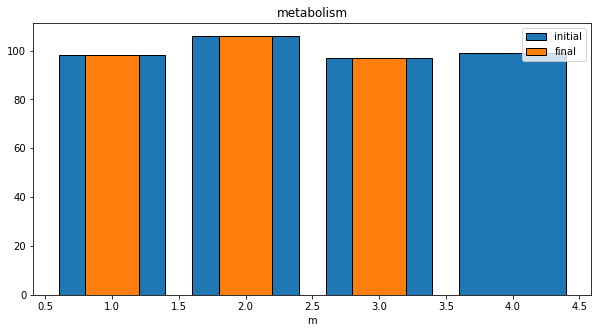

In [ ]:
# Metabolism: initial and final distribution.
m_bins = possible_m
m_bins_edges = np.arange(np.amin(possible_m) - 0.5, np.amax(possible_m) + 0.6)
m_ini_h, m_ini_e = np.histogram(M0, bins=m_bins_edges)
m_fin_h, m_fin_e = np.histogram(M1, bins=m_bins_edges)


plt.figure(figsize=(10, 5))
plt.bar(m_bins, m_ini_h, width=0.8, edgecolor='k', label='initial')
plt.bar(m_bins, m_fin_h, width=0.4, edgecolor='k', label='final')
plt.legend()
plt.xlabel('m')
plt.title('metabolism')
plt.show()





#### Vision

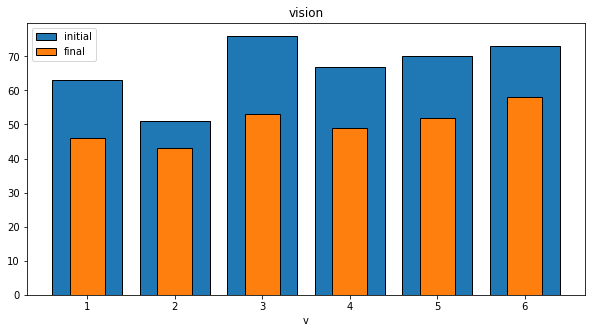

In [ ]:
# Vision: initial and final distribution.
v_bins = possible_v
v_bins_edges = np.arange(np.amin(possible_v) - 0.5, np.amax(possible_v) + 0.6)
v_ini_h, v_ini_e = np.histogram(V0, bins=v_bins_edges)
v_fin_h, v_fin_e = np.histogram(V1, bins=v_bins_edges)


plt.figure(figsize=(10, 5))
plt.bar(v_bins, v_ini_h, width=0.8, edgecolor='k', label='initial')
plt.bar(v_bins, v_fin_h, width=0.4, edgecolor='k', label='final')
plt.legend()
plt.xlabel('v')
plt.title('vision')
plt.show()


#### Sugar

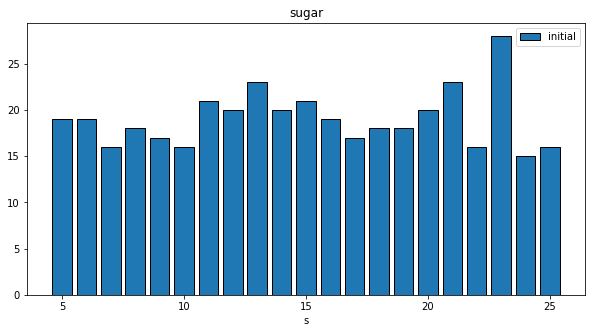

In [ ]:
# Sugar: initial and final distribution.
s_bins_i = possible_s
s_bins_edges_i = np.arange(np.amin(possible_s) - 0.5, np.amax(possible_s) + 0.6)
s_ini_h, s_ini_e = np.histogram(S0, bins=s_bins_edges_i)

plt.figure(figsize=(10, 5))
plt.bar(s_bins_i, s_ini_h, width=0.8, edgecolor='k', label='initial')
plt.legend()
plt.xlabel('s')
plt.title('sugar')
plt.show()




### Lorenz curve and Gini coefficient.

Measure of equality in wealth / resources distribution 

In [ ]:
def Lorenz_curve(s):
    """
    Function to generate the Lorenz curve from a sequence of data.
    
    Parameters
    ==========
    s : Sugar of each agent.
    """
    
    N = np.size(s)
    
    population_fraction = np.arange(N) / N
    
    s_sorted = np.sort(s)
    
    cumulative_s_fraction = np.cumsum(s_sorted) / np.sum(s_sorted)
    
    
    return cumulative_s_fraction, population_fraction

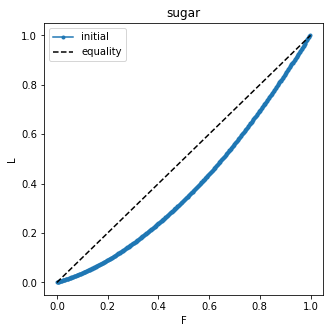

In [ ]:
L0, F0 = Lorenz_curve(S0)


plt.figure(figsize=(5, 5))
plt.plot(F0, L0, '.-', label='initial')
plt.plot([0, 1], [0, 1], '--', color='k', label='equality')
plt.legend()
plt.xlabel('F')
plt.ylabel('L')
plt.title('sugar')
plt.show()


